# Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Importing train set
df_train  = pd.read_csv("Google_Stock_Price_Train.csv")

In [3]:
df_train

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"


In [ ]:
#we need to make it into numpy array and the open column is the target column in this dataset

In [4]:
np_train = df_train.iloc[:,1:2].values #the values function make the column into numpy array

In [5]:
np_train

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [6]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
np_train_scaled = sc.fit_transform(np_train)

In [7]:
np_train_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [ ]:
# Creat a data structure with 60 timesteps and 1 output

In [8]:
x_train = []
y_train = []
for i in range(60, 1258):
    x_train.append(np_train_scaled[i-60:i, 0])
    y_train.append(np_train_scaled[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)

#x_train will have values from i-60 to i and it will be used as input for the prediction
#y train will have the i'th value tht is the value which should be predicted by the model

#example
#x_train will have 0 to 59 values in the first iteration
#y will have the 60'th value
#using the x_train values it has to predict the 60th days stock price
#the predicted value will be checked with the y_train value

In [9]:
x_train

array([[0.08581368, 0.09701243, 0.09433366, ..., 0.07846566, 0.08034452,
        0.08497656],
       [0.09701243, 0.09433366, 0.09156187, ..., 0.08034452, 0.08497656,
        0.08627874],
       [0.09433366, 0.09156187, 0.07984225, ..., 0.08497656, 0.08627874,
        0.08471612],
       ...,
       [0.92106928, 0.92438053, 0.93048218, ..., 0.95475854, 0.95204256,
        0.95163331],
       [0.92438053, 0.93048218, 0.9299055 , ..., 0.95204256, 0.95163331,
        0.95725128],
       [0.93048218, 0.9299055 , 0.93113327, ..., 0.95163331, 0.95725128,
        0.93796041]])

In [10]:
y_train

array([0.08627874, 0.08471612, 0.07454052, ..., 0.95725128, 0.93796041,
       0.93688146])

In [11]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
#used to reeshape into 3d array 
# keras->rnn->input_Size for info

# Building the RNN

In [12]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [13]:
regressor = Sequential() #initializing the rnn

In [ ]:
#adding lstm and dropout layers using the lstm and dropout class

In [14]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
regressor.add(Dropout(0.2))
#units tells the number of neurons in the layer,return_sequence default value is false
#adding the first lstm layer here

In [15]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
#when adding the next lstm layers we dont have to specify the input shape as the neurns in the 1st lstm layers recoginize it

In [16]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
#it is the same case with the 3rd lstm layer

In [17]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
#for the 4th lstm layer or the last lstm layer the return sequences will be false.....hence it is removed as false
#is the default value

In [18]:
regressor.add(Dense(units = 1))
#this is fpr addding the output layer and the units suggest the no. of neurons required which is 1 in this case
#which is the dimensions of the output.....

In [19]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
#compiling 
#compile takes in 2 arguments 1)optimizer and 2)loss
#optimizer can be adam,RMSprop etc
#loss is rms as it is a regression problems

In [20]:
#fitting the rnn to the training set
regressor.fit(x_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 17s 90ms/step - loss: 0.0447
Epoch 2/100
38/38 [==============================] - 3s 90ms/step - loss: 0.0064
Epoch 3/100
38/38 [==============================] - 3s 85ms/step - loss: 0.0070
Epoch 4/100
38/38 [==============================] - 3s 85ms/step - loss: 0.0060
Epoch 5/100
38/38 [==============================] - 3s 81ms/step - loss: 0.0049
Epoch 6/100
38/38 [==============================] - 3s 82ms/step - loss: 0.0051
Epoch 7/100
38/38 [==============================] - 4s 94ms/step - loss: 0.0048
Epoch 8/100
38/38 [==============================] - 3s 86ms/step - loss: 0.0046
Epoch 9/100
38/38 [==============================] - 3s 84ms/step - loss: 0.0045
Epoch 10/100
38/38 [==============================] - 3s 78ms/step - loss: 0.0045
Epoch 11/100
38/38 [==============================] - 3s 79ms/step - loss: 0.0051
Epoch 12/100
38/38 [==============================] - 3s 77ms/step - loss: 0.0041
Epoch 13/100
38/38 [====

38/38 [==============================] - 3s 80ms/step - loss: 0.0014


In [ ]:
#making predictions
#get the real stock price i.e import the test dataset
#similar to the training dataset

In [24]:
df_test  = pd.read_csv("Google_Stock_Price_Test.csv")
np_test = df_test.iloc[:,1:2].values

In [25]:
df_test

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"
5,1/10/2017,807.86,809.13,803.51,804.79,"1,176,800"
6,1/11/2017,805.00,808.15,801.37,807.91,"1,065,900"
7,1/12/2017,807.14,807.39,799.17,806.36,"1,353,100"
8,1/13/2017,807.48,811.22,806.69,807.88,"1,099,200"
9,1/17/2017,807.08,807.14,800.37,804.61,"1,362,100"


In [26]:
np_test

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

In [29]:
df_total = pd.concat((df_train['Open'], df_test['Open']), axis = 0)
inputs = df_total[len(df_total) - len(df_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
x_test = []
for i in range(60, 80):
    x_test.append(inputs[i-60:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
predicted_stock_price = regressor.predict(x_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 2s 2s/step


In [ ]:
#as we r predicting based on the previous 60 days values we need to concat a few values
#hence we take a new df_total and conact only the open column into it
#the inputs conatain the values from 60 days before jan3 

# Visualization

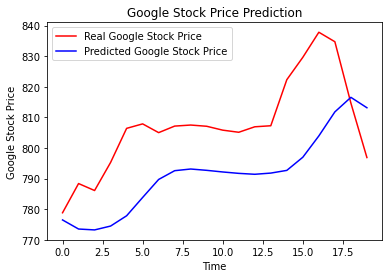

In [31]:
plt.plot(np_test, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [32]:
#this model cannot accurately predict the stock prices but can predict the upward and downward trends in the stock prices